# Lecture 8: Overview of different performance metrics                 

## 1. Review

### 1.1 Bipolar model

**Definition:** Let  $\tilde{\Phi} = \{ (x_i,e_i, y_i,h_i)\}$ represent the marked Poisson point process such that:

(1) The ground process is $\Phi = \{ x_i\}$ where $x_i$ denotes the location of the potential transmitters with density $\lambda>0$ in TXs/m$^2$.


(2) $\{e_i\}$ is the medium access indicator: node $i$ is allowed to transmit if $e_i=1$ and it is not allowed if $e_i=0$. For slotted ALOHA protocol. $e_i$ is a random variable independent and identically distributed such that $\mathbb{P}(e_i=1) = p$ and  $\mathbb{P}(e_i=0) = 1-p$.


(3) $\{y_i\}$ denotes the location of the receiver associated with the transmitter $x_i$ to form a communication pair. We assume that the random vectors ${x_i - y_i}$ are independent and identically distributed such that  $|x_i - y_i| = r$. Here we consider that $r$ is constant.

(4)  $\{h_i\}$ represents the channel gain due to fading in relation to the typical link receiver, located at the origin. We assume that $\{h_i\}$  is also an independent and identically distributed random variables.

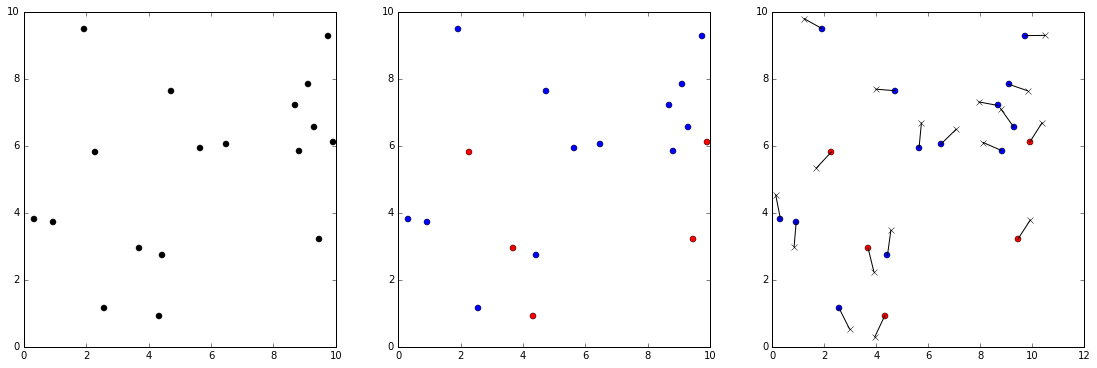

In [4]:
#################
#Illustration####
#################

from matplotlib import pyplot as plt
import numpy as np

#########################
###(1) Ground process###
########################
#Square side: L2
L2 = 10
#Average number of points (Poisson)
x_average_PPP = 20
#Number of points N that is a Poisson random variable 
x_realization_PPP = np.random.poisson(x_average_PPP,1)
#Random points in axis x
position_x_realization_PPP_TX =  np.random.uniform(0,L2,x_realization_PPP)
#Random points in axis y
position_y_realization_PPP_TX = np.random.uniform(0,L2,x_realization_PPP) 

fig, axes = plt.subplots(1, 3, figsize=(19,6), dpi=1200)

#Plot commands
axes[0].plot(position_x_realization_PPP_TX, position_y_realization_PPP_TX, marker='o', color='k',linestyle = '')
#plt.axis('off')

#####################
###(2) ALOHA #######
####################

#aloha probability
p=0.7

#declaring a list of unknown size
position_x_realization_PPP_TX_e_1 = []
position_y_realization_PPP_TX_e_1 = []
position_x_realization_PPP_TX_e_0 = []
position_y_realization_PPP_TX_e_0 = []


for xx in range(0,x_realization_PPP[0]):
    if np.random.random() < p:
        #add element to the list
        position_x_realization_PPP_TX_e_1.append(position_x_realization_PPP_TX[xx])
        position_y_realization_PPP_TX_e_1.append(position_y_realization_PPP_TX[xx])
    else:
        #add element to the list
        position_x_realization_PPP_TX_e_0.append(position_x_realization_PPP_TX[xx])
        position_y_realization_PPP_TX_e_0.append(position_y_realization_PPP_TX[xx])
    xx+=1
    
#converting the list to a np.array
position_x_realization_PPP_TX_e_1 = np.array(position_x_realization_PPP_TX_e_1)
position_y_realization_PPP_TX_e_1 = np.array(position_y_realization_PPP_TX_e_1 )
position_x_realization_PPP_TX_e_0 = np.array(position_x_realization_PPP_TX_e_0)
position_y_realization_PPP_TX_e_0 = np.array(position_y_realization_PPP_TX_e_0)


axes[1].plot(position_x_realization_PPP_TX_e_1, position_y_realization_PPP_TX_e_1, marker='o', color='b',linestyle = '')
axes[1].plot(position_x_realization_PPP_TX_e_0, position_y_realization_PPP_TX_e_0, marker='o', color='r',linestyle = '')

#####################
###(3) Receivers####
####################

#distance between TX-RX (fixed)
dist_TX_RX = 0.75

#angles of the receivers
angle_RX = np.random.uniform(0,2*np.pi,x_realization_PPP)
#setting arrays
position_x_realization_PPP_RX = np.zeros(x_realization_PPP)
position_y_realization_PPP_RX = np.zeros(x_realization_PPP)

#RXs position
for xx in range(0,x_realization_PPP[0]):
    position_x_realization_PPP_RX[xx] = position_x_realization_PPP_TX[xx] + dist_TX_RX*np.cos(angle_RX[xx])
    position_y_realization_PPP_RX[xx] = position_y_realization_PPP_TX[xx] + dist_TX_RX*np.sin(angle_RX[xx])
    xx+=1


axes[2].plot(position_x_realization_PPP_RX, position_y_realization_PPP_RX, marker='x', color='k',linestyle = '')
axes[2].plot(position_x_realization_PPP_TX_e_1, position_y_realization_PPP_TX_e_1, marker='o', color='b',linestyle = '')
axes[2].plot(position_x_realization_PPP_TX_e_0, position_y_realization_PPP_TX_e_0, marker='o', color='r',linestyle = '')
#plot lines between links - bipoles
axes[2].plot([position_x_realization_PPP_TX, position_x_realization_PPP_RX],
         [position_y_realization_PPP_TX, position_y_realization_PPP_RX],  color='k',linestyle = '-')
plt.show()

### 1.2 Performance analysis

**Scenario description**

- Bipolar wireless network $\tilde{\Phi} = \{ (x_i,e_i, y_i, h_i)\}$ such that the ground process is a two dimensional homogeneous Poisson point process with intensity $\lambda$, the transmitters access the network with probability $p$ (slotted ALOHA), the receivers are located at a distance $r$ far from its respective transmitter and $h_i$ is related to Rayleigh fading with mean 1.


- The distance-dependent path-loss function is given by $\ell(x) =  x^{-\alpha}$ where $\alpha>2$ is the path-loss exponent.


- The network is assumed *interference-limited* so that the noise effect is neglected. 


- The receivers employ the decoding rule *treat-interference-as-noise* where the message can be successfully decoded if $\textrm{SIR} > \beta$. 

### 1.3 Analytical results

[Step 1] The point process $\tilde{\Phi}$ is stationary and then it is worth to analyze a typical link, which will be referred by using the index $0$. The point process is then $\tilde{\Phi} \cup \{x_0,e_0,y_0,h_0\}$. The receiver of the typical link will be located at the origin - i.e. $y_0 = (0,0)$.

[Step 2] Find the process of active links as thinning of  $\tilde{\Phi}$  keeping only the points (transmitters) that $e_i = 1$. Let us denote the thinned marked process $\tilde{\Phi}_1$ whose density is $p \lambda$.

[Step 3] Compute the probability $p_\mathrm{s}$ that a message is successfully decoded a typical receiver (i.e $\textrm{SIR}_0 > \beta$). From the analysis done in the previous lecture: 

<br><center> $\displaystyle p_\mathrm{s} = e^{-p \lambda \pi r^2 \beta^{2/\alpha} \kappa}$, </center></br> 

where $\displaystyle \kappa = \Gamma(1 + 2/\alpha)\Gamma(1-2/\alpha)$.




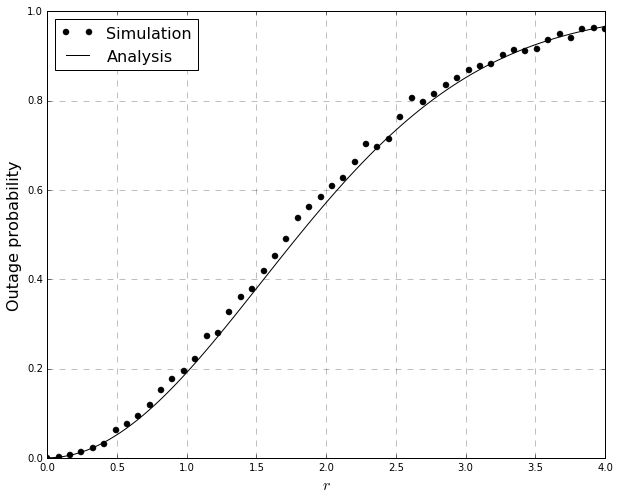

In [6]:
#Testing
import numpy as np
from scipy.spatial import distance
from __future__ import division
import statsmodels.api as sm # recommended import according to the docs
import math
#################
##Inputs########
###############

#pathloss
alpha=4
#SIR required
beta= 2
#aloha prob
p=0.9
#Average number of points (Poisson)
x_average_PPP = p*15
#Square side: L
L = 20
#number of realizations to get the outage prob for 1 point
num_realizations = 2000
#number of simulation points
num_of_point_for_outage = 50
#
outage_prob = np.zeros(num_of_point_for_outage)
r = np.linspace(0,4,num_of_point_for_outage)

for count2 in range(1, num_of_point_for_outage):
    outage = 0
    for count in range(0, num_realizations):
        #Number of points N that is a Poisson random variable 
        x_realization_PPP = np.random.poisson(x_average_PPP,1)
        #Random points in axis x
        position_x_realization_PPP =  np.random.uniform(0,L,x_realization_PPP)
        #Random points in axis y
        position_y_realization_PPP = np.random.uniform(0,L,x_realization_PPP) 
        #Manipulating arrays
        position_x_realization_PPP_t=np.transpose(position_x_realization_PPP)
        position_y_realization_PPP_t=np.transpose(position_y_realization_PPP)
        position_final = []
        position_final = [[position_x_realization_PPP_t[ix], position_y_realization_PPP_t[ix]] for ix in range(0, x_realization_PPP)]
        #Distances to the origin (L/2,L/2)
        distances_to_origin = [distance.euclidean(position_final[ix],[L/2,L/2]) for ix in range(0, x_realization_PPP)]
        #getting the power of each interferer
        path_loss_fading = np.array([np.random.exponential(1) * distances_to_origin[xx]**(-alpha) for xx in range(0, x_realization_PPP)])
        #computing aggregate interference
        interference = sum(path_loss_fading)
        if (np.random.exponential(1) * r[count2]**(-alpha)/interference) <= beta:
                outage = outage + 1   
        count = count + 1
    outage_prob[count2] = outage/count
    count2 = count2 + 1

###Plot


  
k = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
plt.figure(figsize=(10,8), dpi=1200)
plt.plot(r,outage_prob,'o k',label = "Simulation")
x = np.linspace(0,4,100)
plt.xlabel('$r$', fontsize=16)
plt.ylabel('Outage probability', fontsize=16)
plt.plot(x, 1 -  np.exp(- (x**2) * k * beta**(2/alpha) * np.pi * p * x_average_PPP/(L**2)),'k-' ,label = "Analysis")
plt.axis([0,4,0,1])
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.legend(loc=2,fontsize=16)
plt.show()

## 2. Performance analysis

### 2.1 Expected progress in [m]

<center><br> $\displaystyle \mathrm{EP} = r \times (1- P_\mathrm{out}) = r \; e^{-p \lambda \pi r^2 \beta^{2/\alpha} \kappa}$  </center></br> 

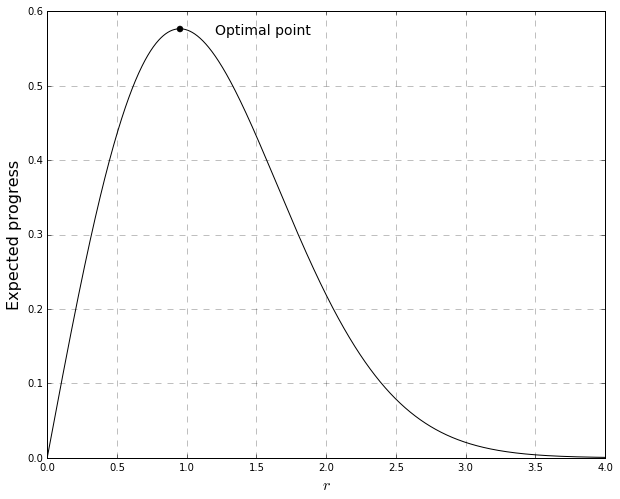

In [8]:
#Expected progress
#
alpha = 3
beta = 3
density = 0.05
p = 0.7
k = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
r_opt = (2/(np.pi * k * density * p))**(1/2)/(2 * beta**(1/alpha))

plt.figure(figsize=(10,8), dpi=1200)
r = np.linspace(0,4,1000)
plt.xlabel('$r$', fontsize=16)
plt.ylabel('Expected progress', fontsize=16)
plt.plot(r, r * np.exp(- (r**2) * beta**(2/alpha) * np.pi * p * k * density),'k-')
plt.plot(r_opt, r_opt * np.exp(- (r_opt**2) * beta**(2/alpha) * np.pi * p * k * density),'k o')
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.text(1.2, 0.57, 'Optimal point', fontsize=14)
plt.show()

*Exercise:* Find the optimal point


In [13]:
# Using sympy to solve analytically the optimization problem
from sympy import Symbol, symbols, init_printing, oo
from sympy import simplify
from sympy import *

# From future
from __future__ import division

# Setting things up
init_printing(use_unicode = False, wrap_line = False, no_global = True)

In [14]:
#Defining variables
r2, p2, lamb2, beta2, alpha2, kappa = symbols('r p lambda beta alpha kappa', real = True, positive = True)

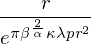

In [16]:
#Success probability
p_s= exp(- p2 * kappa* lamb2 * pi * r2**2 * beta2**(2/alpha2))

#EP
EP = r2 * p_s

EP

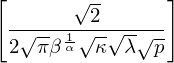

In [17]:
#Best r
simplify(solve(diff(EP,r2),r2))

In [22]:
#Verifying
alpha = 3
beta = 3
density = 0.05
p = 0.7
k = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
(2/(np.pi * k * density * p))**(1/2)/(2 * beta**(1/alpha))

In [21]:
r_opt * np.exp(- (r_opt**2) * beta**(2/alpha) * np.pi * p * k * density)

### 2.2 Information efficiency in [bit-m/s/Hz]

<center><br> $\displaystyle \mathrm{IE} = r \times \log(1+\beta) \times (1- P_\mathrm{out})  = r \; \log(1+\beta) \; e^{-p \lambda \pi r^2 \beta^{2/\alpha} \kappa}$  </center></br> 





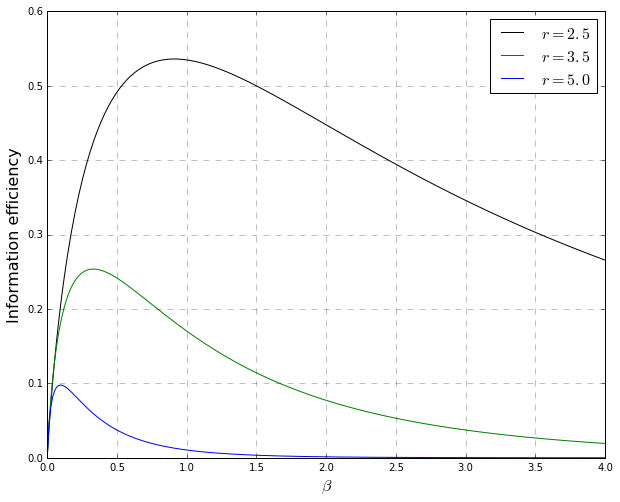

In [24]:
#IE
#
alpha = 4
density = 0.05
r1 = 2.5
r2 = 3.5
r3 = 5
p = 1
k = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)

plt.figure(figsize=(10,8), dpi=1200)
beta = np.linspace(0,4,300)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel('Information efficiency', fontsize=16)
plt.plot(beta, r1 * (np.log(1+beta)/np.log(2)) * np.exp(- (r1**2) * k * beta**(2/alpha) * np.pi * p * density),'k-',label = "$r=2.5$")
plt.plot(beta, r2 * (np.log(1+beta)/np.log(2)) * np.exp(- (r2**2) * k * beta**(2/alpha) * np.pi * p * density),'g-',label = "$r=3.5$")
plt.plot(beta, r3 * (np.log(1+beta)/np.log(2)) * np.exp(- (r3**2) * k * beta**(2/alpha) * np.pi * p * density),'b-',label = "$r=5.0$")
#plt.axis([0,4,0,1])
plt.legend(loc=1,fontsize=16)
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

### 2.3 Spatial throughput (or area spectral efficiency or density of throughput) in [bit/s/Hz/m$^2$]

<center><br> $\displaystyle \mathrm{ST} = p \times \lambda  \times (1- P_\mathrm{out}) \times \log(1+\beta)  = p \lambda \; \log(1+\beta) \; e^{-p \lambda \pi r^2 \beta^{2/\alpha} \kappa}$  </center></br> 

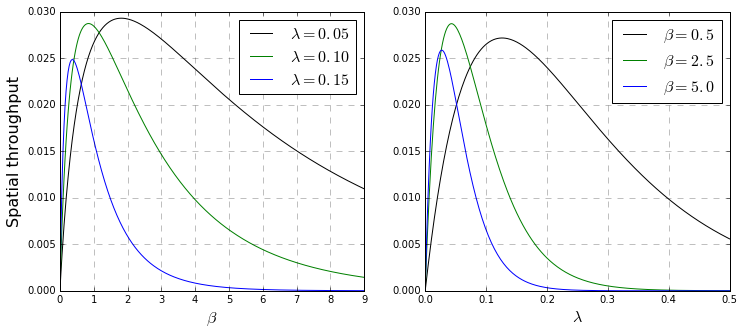

In [26]:
#Spatial throughput
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
#
alpha = 3
r = 2
density1 = 0.05
density2 = 0.1
density3 = 0.2
p = 1


fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=1200)

beta = np.linspace(0,9,300)
axes[0].set_xlabel(r'$\beta$', fontsize=16)
axes[0].set_ylabel('Spatial throughput', fontsize=16)
axes[0].plot(beta, p * density1 * (np.log(1+beta)/np.log(2)) * np.exp(- (r**2) * beta**(2/alpha) * np.pi * p * density1),'k-',
             label = "$\lambda=0.05$")
axes[0].plot(beta, p *density2 * (np.log(1+beta)/np.log(2)) * np.exp(- (r**2) * beta**(2/alpha) * np.pi * p * density2),'g-',
             label = "$\lambda=0.10$")
axes[0].plot(beta, p * density3 * (np.log(1+beta)/np.log(2)) * np.exp(- (r**2) * beta**(2/alpha) * np.pi * p * density3),'b-',
             label = "$\lambda=0.15$")
#plt.axis([0,4,0,1])
axes[0].legend(loc=1,fontsize=16)
axes[0].grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)

#####

alpha = 3
r = 2
beta1 = 0.5
beta2 = 2.5
beta3 = 5
p = 1
density = np.linspace(0,0.5,300)
axes[1].set_xlabel(r'$\lambda$', fontsize=16)
axes[1].plot(density, p * density * (np.log(1+beta1)/np.log(2)) * np.exp(- (r**2) * beta1**(2/alpha) * np.pi * p * density),'k-',
             label = r'$\beta=0.5$')
axes[1].plot(density, p *density * (np.log(1+beta2)/np.log(2)) * np.exp(- (r**2) * beta2**(2/alpha) * np.pi * p * density),'g-',
             label = r'$\beta=2.5$')
axes[1].plot(density, p *density * (np.log(1+beta3)/np.log(2)) * np.exp(- (r**2) * beta3**(2/alpha) * np.pi * p * density),'b-',
             label = r'$\beta=5.0$')

#plt.axis([0,4,0,1])
axes[1].legend(loc=1,fontsize=16)
axes[1].grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)

fig.show()

### 2.4 Transmission capacity in [bit/s/Hz/m$^2$]

*Definition:* Transmission capacity is the maximum spatial throughput (in terms of the network density) such that the outage probability $p_\mathrm {o}$ must be lower or equal to a given constraint $\epsilon$ (which is usually a small number). Mathematically:

<center><br> $\displaystyle \mathrm{TC} = \max\limits_ {\lambda}  \mathrm{ST} = p \lambda \; \log(1+\beta) \; e^{-p \lambda \pi r^2 \beta^{2/\alpha} \kappa}\\ \mathrm{s.t.}\; \; p_\mathrm {o} = 1-p_\mathrm{s} = e^{-p \lambda \pi r^2 \beta^{2/\alpha} \kappa} \leq \epsilon$  </center></br> 

*Exercise:* Compute the transmission capacity.

## 4. References

[1] M. Haenggi, *Stochastic Geometry for Wireless Networks*, 105-108.

[2] F. Baccelli, B.BlaszczyszynStochastic, *Geometry and Wireless Networks, Volume II- Applications*, pages 3-27

[3] P. Nardelli, *Analysis of the spatial throughput in interference networks*, pages 22-26


<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.